In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler as ros 
from collections import Counter

In [2]:
data = pd.read_excel('right.xlsx')

In [3]:
data

,19.105261,34.058773,2.000000,0.280475
0,19.198039,34.132096,2,0.281231
1,20.049876,35.057096,2,0.285960
2,19.198039,35.057096,2,0.273811
3,19.253424,34.058773,2,0.282650
4,19.105261,34.058773,2,0.280475
...,...,...,...,...
12976,12.407318,17.117243,2,0.362422
12977,12.082763,18.248288,2,0.331066
12978,9.123106,17.117243,2,0.266489
12979,14.142136,16.278821,2,0.434372


In [4]:
data.columns = ["Dist1", "Dist2" , "op","Dist3"]

In [5]:
data

,Dist1,Dist2,op,Dist3
0,19.198039,34.132096,2,0.281231
1,20.049876,35.057096,2,0.285960
2,19.198039,35.057096,2,0.273811
3,19.253424,34.058773,2,0.282650
4,19.105261,34.058773,2,0.280475
...,...,...,...,...
12976,12.407318,17.117243,2,0.362422
12977,12.082763,18.248288,2,0.331066
12978,9.123106,17.117243,2,0.266489
12979,14.142136,16.278821,2,0.434372


In [6]:
data.isnull().sum()

Dist1    0
Dist2    0
op       0
Dist3    0
dtype: int64

<AxesSubplot:>

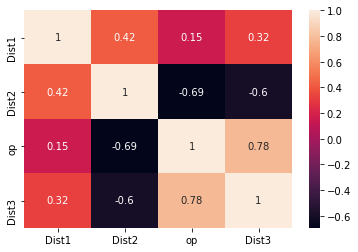

In [7]:
sns.heatmap(data.corr(), annot = True)

In [8]:
data["op"].value_counts()

2    11604
0     1215
1      162
Name: op, dtype: int64

In [10]:
X = data.iloc[:,0:2] 
X["Data3"] = data.iloc[:,3]
print(X.head)

<bound method NDFrame.head of            Dist1      Dist2     Data3
0      19.198039  34.132096  0.281231
1      20.049876  35.057096  0.285960
2      19.198039  35.057096  0.273811
3      19.253424  34.058773  0.282650
4      19.105261  34.058773  0.280475
...          ...        ...       ...
12976  12.407318  17.117243  0.362422
12977  12.082763  18.248288  0.331066
12978   9.123106  17.117243  0.266489
12979  14.142136  16.278821  0.434372
12980   8.000000  16.031220  0.249513

[12981 rows x 3 columns]>


In [12]:
y = data.iloc[:,2]
y

0        2
1        2
2        2
3        2
4        2
        ..
12976    2
12977    2
12978    2
12979    2
12980    2
Name: op, Length: 12981, dtype: int64

In [16]:
ros = ros(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [17]:
print(Counter(data["op"]))
print(Counter(y_res))

Counter({2: 11604, 0: 1215, 1: 162})
Counter({2: 11604, 0: 11604, 1: 11604})


# converting data back for model training

In [18]:
dx = pd.DataFrame(X_res)
dy = pd.Series(y_res)

In [19]:
dx

,Dist1,Dist2,Data3
0,19.198039,34.132096,0.281231
1,20.049876,35.057096,0.285960
2,19.198039,35.057096,0.273811
3,19.253424,34.058773,0.282650
4,19.105261,34.058773,0.280475
...,...,...,...
34807,43.117739,94.339811,0.228524
34808,8.000000,19.026298,0.210235
34809,24.534842,65.122961,0.188373
34810,6.324555,16.278821,0.194257


In [20]:
dy

0        2
1        2
2        2
3        2
4        2
        ..
34807    1
34808    1
34809    1
34810    1
34811    1
Name: op, Length: 34812, dtype: int64

# Standardising the Data

In [21]:
std1 = StandardScaler()
dx1= std1.fit_transform(dx)
dx1 = pd.DataFrame(dx1)
print(dx1.head())

          0         1         2
0  1.409980  0.091367  0.756550
1  1.550844  0.134710  0.804346
2  1.409980  0.134710  0.681550
3  1.419139  0.087931  0.770888
4  1.394638  0.087931  0.748903


# Model Training

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [27]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(dx1,dy,test_size = 0.3,random_state = 42)

In [28]:
lr1 = LogisticRegression()
lr1.fit(x_train,y_train)
ypred = lr1.predict(x_test)
print("Accuracy score - {} ".format(accuracy_score(y_test,ypred)))
print("Confusion matrix -\n {} ".format(confusion_matrix(y_test,ypred)))
print("Cllasification report - \n {} ".format(classification_report(y_test,ypred)))
print("Score(test) - {} ".format(lr1.score(x_test,y_test)))
print("Score(train) - {} ".format(lr1.score(x_train,y_train)))

Accuracy score - 0.9939678284182306 
Confusion matrix -
 [[3431   57    0]
 [   0 3475    0]
 [   0    6 3475]] 
Cllasification report - 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3488
           1       0.98      1.00      0.99      3475
           2       1.00      1.00      1.00      3481

    accuracy                           0.99     10444
   macro avg       0.99      0.99      0.99     10444
weighted avg       0.99      0.99      0.99     10444
 
Score(test) - 0.9939678284182306 
Score(train) - 0.9938443860801051 


# Saving Model using pickle

In [29]:
import pickle as pkl

In [30]:
pkl.dump(lr1,open("right_eye_model",'wb'))
pkl.dump(std1,open("right_eye_scaling_datamodel",'wb'))

# Testing if the model works

In [31]:
model = pkl.load(open('right_eye_model','rb'))

In [34]:
result = model.predict([x_test.iloc[6,:]])
print(result)

[0]


In [35]:
y_test.iloc[6]

0